<a href="https://colab.research.google.com/github/SultanaUmmeHabiba/Fake-Job-Post-Detection-using-SMOTE/blob/main/fakejob_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install smote-variants

     |████████████████████████████████| 143kB 5.8MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=ec226996814380455131dd527f8eb7bee7c1ef9f0ff152909d808db4939b72be
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7454 sha256=8cf51b5b551c7c6495c4019e343a16503e69d91f57bbb16d798d9cc4077a1d5b
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built minisom statistics


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FakeDataNew1.csv to FakeDataNew1.csv


In [ ]:
import io
import pandas as pd


dataset= pd.read_csv(io.BytesIO(uploaded['FakeDataNew1.csv']))

# **Without smote**

In [ ]:
X= dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values


majority class: 17014
minority class: 866


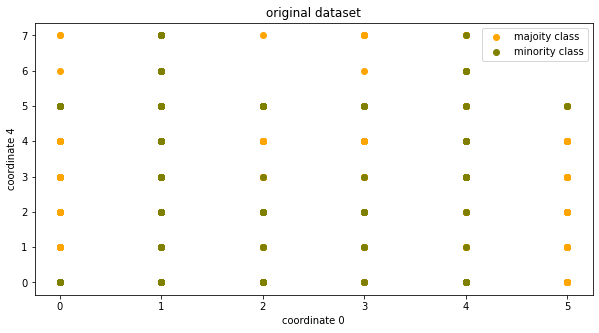

In [ ]:

plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,3], X[y == 0][:,4], label='majoity class', c='orange')
plt.scatter(X[y == 1][:,3], X[y == 1][:,4], label='minority class', c='olive')
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.legend()

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


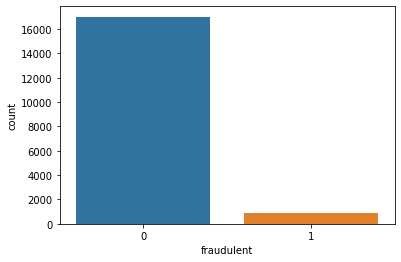

In [ ]:
import seaborn as sns
sns.countplot(dataset['fraudulent'])

In [ ]:

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 17014
minority class: 866


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

random Forest accuracy:  95.0503355704698
[[3386    9]
 [ 168   13]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.59      0.07      0.13       181

    accuracy                           0.95      3576
   macro avg       0.77      0.53      0.55      3576
weighted avg       0.93      0.95      0.93      3576

95.4026845637584
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17014
           1       0.68      0.10      0.17       866

    accuracy                           0.95     17880
   macro avg       0.82      0.55      0.57     17880
weighted avg       0.94      0.95      0.94     17880



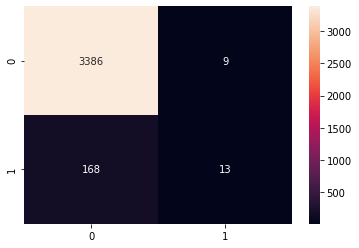

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")

scores = cross_val_score(clf_rf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X, y, cv=10)
print(classification_report(y,predictions))

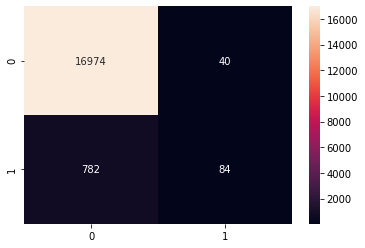

In [ ]:
sns.heatmap(confusion_matrix(y,predictions),annot=True,fmt="0.0f")

# **With smote**

In [ ]:
import smote_variants as sv
oversampler= sv.SMOTE()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-15 15:26:02,618:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 15:26:02,696:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 15:26:02,748:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
oversamplers= sv.get_all_oversamplers()
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 0
minority new samples: 16148


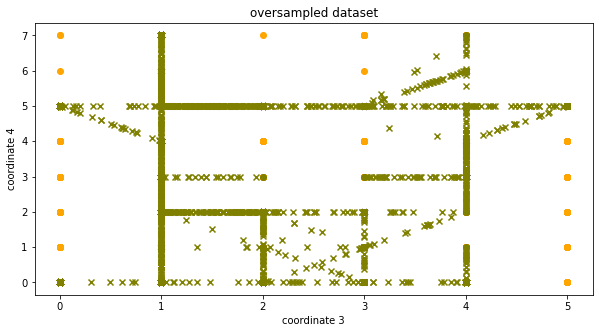

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,3], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,3], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 1][:,3], X_samp[y_samp == 1][:,4], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 3')
plt.ylabel('coordinate 4')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


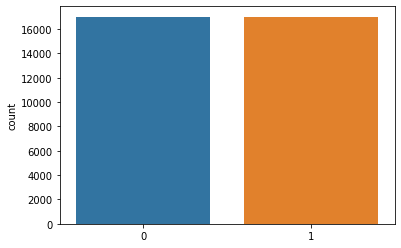

In [ ]:
sns.countplot(y_oversample)

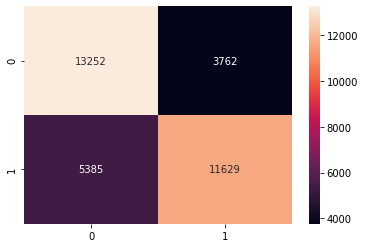

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

random Forest accuracy:  84.03243847874721
[[2870  525]
 [  46  135]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      3395
           1       0.20      0.75      0.32       181

    accuracy                           0.84      3576
   macro avg       0.59      0.80      0.62      3576
weighted avg       0.94      0.84      0.88      3576

85.34143629190483
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     17014
           1       0.82      0.90      0.86     17014

    accuracy                           0.85     34028
   macro avg       0.86      0.85      0.85     34028
weighted avg       0.86      0.85      0.85     34028



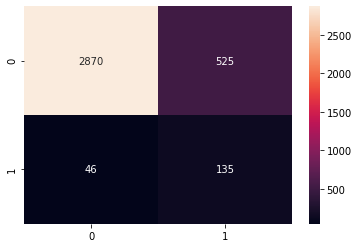

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_rf, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

# **With smote veriant**

In [ ]:
import smote_variants as sv
oversampler= sv.SMOTE_TomekLinks()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-15 15:26:22,229:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 15:26:22,234:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/usr/local/lib/python3.6/dist-packages/numpy/random/__init__.py'>}")
2020-11-15 15:26:22,320:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval
2020-11-15 15:26:24,262:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 15:26:24,263:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/usr/local/lib/python3.6/dist-packages/numpy/random/__init__.py'>}")
2020-11-15 15:26:24,324:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval
2020-11-15 15:26:25,607:

In [ ]:
oversamplers= sv.get_all_oversamplers()

In [ ]:
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 0
minority new samples: 16148


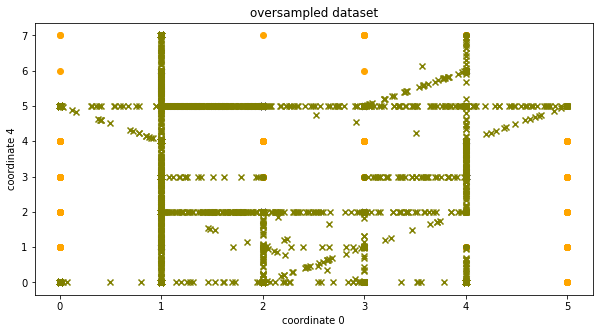

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,3], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,3], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 1][:,3], X_samp[y_samp == 1][:,4], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


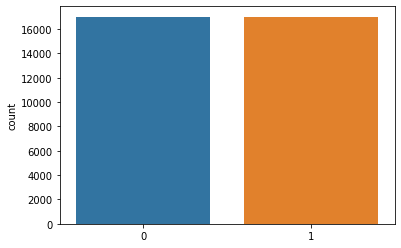

In [ ]:
sns.countplot(y_oversample)

random Forest accuracy:  83.61297539149888
[[2856  539]
 [  47  134]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      3395
           1       0.20      0.74      0.31       181

    accuracy                           0.84      3576
   macro avg       0.59      0.79      0.61      3576
weighted avg       0.94      0.84      0.88      3576

85.53591230755173
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     17011
           1       0.83      0.90      0.86     17011

    accuracy                           0.86     34022
   macro avg       0.86      0.86      0.86     34022
weighted avg       0.86      0.86      0.86     34022



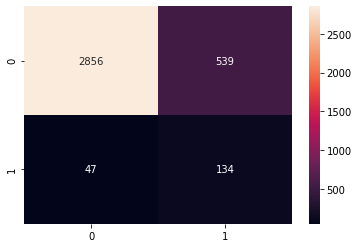

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(Xtrain_oversample, ytrain_oversample)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
scores = cross_val_score(clf_rf, X_oversample, y_oversample, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))


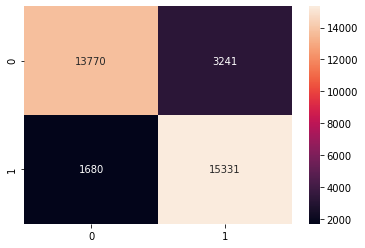

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")